In [29]:
# !pip install textblob

In [30]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [31]:
pd.set_option('display.max_colwidth', None) #prevent truncated view of dataframe
pd.set_option('display.max_rows', None) #show all rows

In [32]:
pd.options.display.max_rows = None

In [33]:
df = pd.read_csv("31_mar_clean_all_job_data.csv")

In [34]:
df = df.drop(df.columns[0:2], axis=1)

In [54]:
df.keyword.value_counts()

data analyst            581
cloud engineer          577
tech project manager    559
computer research       547
software engineer       541
data scientist          309
uiux designer            40
Name: keyword, dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3154 entries, 0 to 3153
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   keyword                            3154 non-null   object 
 1   link                               3154 non-null   object 
 2   job_id                             3154 non-null   int64  
 3   job_title                          3154 non-null   object 
 4   job_expired                        3154 non-null   bool   
 5   job_confidential                   3154 non-null   bool   
 6   job_salary_min                     708 non-null    float64
 7   job_salary_max                     708 non-null    float64
 8   job_salary_currency                2994 non-null   object 
 9   company                            3136 non-null   object 
 10  job_post_date                      3154 non-null   object 
 11  job_internship                     3154 non-null   bool 

In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [38]:
vectorizer = TfidfVectorizer(ngram_range=(1,3)) #unigram to trigram
#Tokenize and build vocabulary
X = vectorizer.fit_transform(df.clean_job_desc)
y = df.keyword

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109) 
print("train data shape: ",X_train.shape)
print("test data shape: ",X_test.shape)

train data shape:  (2523, 593958)
test data shape:  (631, 593958)


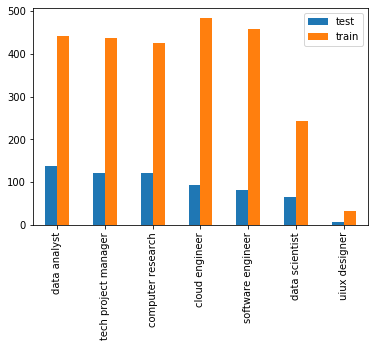

In [40]:
bar_df = pd.merge(y_test.value_counts(),y_train.value_counts(),left_index=True, right_index=True)
bar_df = bar_df.rename(columns={"keyword_x": "test", "keyword_y": "train"})

bar_df.plot.bar()

In [41]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

y_predicted = clf.predict(X_test)

In [42]:
print("Accuracy score is: ",accuracy_score(y_test, y_predicted))
print("Classes: (to help read Confusion Matrix)\n", clf.classes_)
print("Confusion Matrix: ")

print(confusion_matrix(y_test, y_predicted))
print("Classification Report: ")
print(classification_report(y_test, y_predicted))

Accuracy score is:  0.7670364500792393
Classes: (to help read Confusion Matrix)
 ['cloud engineer' 'computer research' 'data analyst' 'data scientist'
 'software engineer' 'tech project manager' 'uiux designer']
Confusion Matrix: 
[[ 90   0   0   0   2   1   0]
 [  2 113   1   0   5   1   0]
 [ 17   4  93   0  11  14   0]
 [  2  24  19  16   3   2   0]
 [ 11   1   0   0  69   1   0]
 [ 11   1   6   0   1 103   0]
 [  0   0   0   0   4   3   0]]
Classification Report: 
                      precision    recall  f1-score   support

      cloud engineer       0.68      0.97      0.80        93
   computer research       0.79      0.93      0.85       122
        data analyst       0.78      0.67      0.72       139
      data scientist       1.00      0.24      0.39        66
   software engineer       0.73      0.84      0.78        82
tech project manager       0.82      0.84      0.83       122
       uiux designer       0.00      0.00      0.00         7

            accuracy         

C:\Users\teo-e\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\teo-e\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\teo-e\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
print(clf.coef_)
print(clf.coef_.shape)

[[-13.31365265 -13.31365265 -13.31365265 ... -13.31365265 -13.31365265
  -13.31365265]
 [-13.30654765 -13.30654765 -13.30654765 ... -13.30654765 -13.30654765
  -13.30654765]
 [-13.31033365 -13.31033365 -13.31033365 ... -13.31033365 -13.31033365
  -13.31033365]
 ...
 [-13.30926903 -13.30926903 -13.30926903 ... -13.30926903 -13.30926903
  -13.30926903]
 [-13.31264626 -13.31264626 -13.31264626 ... -13.29087444 -13.29087444
  -13.29087444]
 [-13.29582253 -13.29582253 -13.29582253 ... -13.29582253 -13.29582253
  -13.29582253]]
(7, 593958)


C:\Users\teo-e\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


In [44]:
from textblob import TextBlob
technical_skills = ['data', 'css', 'rest', 'tableau', 'docker', 'bigquery', 'c++', 'nltk', 'autodesk', 'scipy', 
                    'documentation', 'spring', 'mongdb', 'vue', 'jira', 'salesforce', 'plotly', 'visualisation', 
                    'optimization', 'net', 'thinking', 'gcp', 'tailwind', 'quantum', 'mongodb', 'agile', 'tensorflow',
                    'database', 'asp', 'sqlalchemy', 'io', 'spark', 'html5', 'blockchain', 'c', 'django', 'lambda',
                    'git', 'web development', 'cognos', 'json', 'analysis', 'rabbitmq', 'excel', 'pos', 'restful', 
                    'angularjs', 'numpy', 'passport', 'visual basic', 'erp', 'pytorch', 'cordova', 'nuxt', 'scraping',
                    'jenkins', 'java', 'script', 'bi', 'qliksense', 'scala', 'r', 'firebase', 'mobile', 'html', 'abap',
                    'splunk', 'php', 'javase', 'express', 'oop', 'javascript', 'wordpress', 'amqp', 'figma', 'nosql', 
                    'sas enterprise', 'b', 'mvc', 'linux', 'services aws', 'android', 'vba', 'nodejs', 'springboot',
                    'phpmyadmin', 'hadoop', 'ssis', 'angular', 'typescript', 'pandas', 'api', 'ai', 'sas', 'kong', 
                    'ruby', 'microservices', 'exploratory', 'lightroom', 'consulting', 'c#', 'mysql', 'postgresql', 
                    'customer service', 'aws', 'signavio', 'flask', 'bootstrap', 'flutter', 'tibco', 'reactjs', 
                    'react', 'vuejs', 'devops', 'postman', 'adobe', 'kotlin', 'dbms', 'keras', 'cypress', 'scikit', 
                    'trello', 'sql', 'spring boot', 'matplotlib', 'spotfire', 'dotnet', 'bash', 'python', 'asp.net', 
                    'power bi', 'ux', 'rails', 'wamp', 'gis', 'swift', 'seo', 'axure', 'solidity', 'node', 'ui', 
                    'modeling', 'github', 'laravel', 'soql', 'scikit-learn', 'js', 'fastai', 'autocad', 'apache', 
                    'jupyter', 'react js', 'nlp', 'ubuntu']
feature_array = vectorizer.get_feature_names()
# number of overall model features
features_numbers = len(feature_array)
## max sorted features number
n_max = int(features_numbers * 0.1)

##initialize output dataframe
output = pd.DataFrame()
for i in range(0,len(clf.classes_)):
    print("\n****" ,clf.classes_[i],"****\n")
    class_prob_indices_sorted = clf.feature_log_prob_[i, :].argsort()[::-1]
    raw_skills = np.take(feature_array, class_prob_indices_sorted[:n_max])
    print("list of unprocessed skills :")
    [print(x, end=", ") for x in raw_skills[:20]] 
    print()
    print("#"*20)
    
    ## Extract technical skills
    top_technical_skills= list(set(technical_skills).intersection(raw_skills))
    #print("Top technical skills",top_technical_skills)
    print("list of programming language")
    [print(x, end=", ") for x in top_technical_skills[:20]]
    print()
    print("#"*20)
    
    ## Extract adjectives
    
    # Delete technical skills from raw skills list
    #At this steps, raw skills list doesnt contain the technical skills
    raw_skills = [x for x in raw_skills if x not in top_technical_skills]
    raw_skills = list(set(raw_skills) - set(top_technical_skills))

    # transform list to string
    txt = " ".join(raw_skills)
    blob = TextBlob(txt)
    #top 6 adjective
    top_adjectives = [w for (w, pos) in TextBlob(txt).pos_tags if pos.startswith("JJ")]
    print("Top adjectives: ")
    [print(x, end=", ") for x in top_adjectives[:20]]
    print()
    print("#"*20)
    print()
    
    output = output.append({'job_title':clf.classes_[i],
                        'raw_skills' : raw_skills,
                        'technical_skills':top_technical_skills,
                        'soft_skills':top_adjectives },
                       ignore_index=True)


**** cloud engineer ****

list of unprocessed skills :
cloud, infrastructure, security, service, technology, system, aws, solution, team, devops, application, operation, amp, azure, support, environment, tool, management, business, technical, 
####################
list of programming language
analysis, io, ux, spring, lambda, salesforce, thinking, jira, kotlin, bi, mobile, gcp, spark, splunk, git, swift, optimization, node, reactjs, documentation, 
####################
Top adjectives: 
current, workflow, etc, understanding, html, define, technical, cloud, flexible, multiple, salesforce, org, able, cyber, subject, metric, manifest, native, continuous, workflow, 
####################


**** computer research ****

list of unprocessed skills :
research, computer, engineering, learning, science, computer science, machine, machine learning, application position, invite application, invite application position, invite, data, ai, candidate, position, science engineering, electrical, applicat

In [45]:
TextBlob("description position suitable individual constant learner problem solver multi taskers candidate thrive fast paced environment step face challenge able deliver result welcome apply looking candidate interested implementation operation cloud infrastructure responsible implementing maintaining cloud infrastructure aws azure google cloud xtremax customer provide support customer issue cloud infrastructure closely security monitor privacy develop incident response procedure least year hand managing network infrastructure managed service aws azure gcp least one cloud certification level higher e g aws certified sysops administrator associate microsoft certified azure administrator associate google cloud certified professional data engineer least one operating system linux window understanding networking preferable tcp ip ip address http dns basic security concept user management o hardening communication scripting skill powershell bash python nodejs etc extra value submitting resume cv consent agree allow information provided used processed behalf xtremax pte ltd purpose registration interest current future employment u processing application employment personal data held u relating application kept strictly confidential accordance pdpa may also refer privacy policy detail http www xtremax com privacy policy inform consent providing necessary data required u process application potentially able offer").pos_tags

[('description', 'NN'),
 ('position', 'NN'),
 ('suitable', 'JJ'),
 ('individual', 'JJ'),
 ('constant', 'JJ'),
 ('learner', 'NN'),
 ('problem', 'NN'),
 ('solver', 'NN'),
 ('multi', 'NN'),
 ('taskers', 'NNS'),
 ('candidate', 'VBP'),
 ('thrive', 'JJ'),
 ('fast', 'NN'),
 ('paced', 'VBD'),
 ('environment', 'NN'),
 ('step', 'NN'),
 ('face', 'NN'),
 ('challenge', 'VBP'),
 ('able', 'JJ'),
 ('deliver', 'NN'),
 ('result', 'NN'),
 ('welcome', 'VBP'),
 ('apply', 'NN'),
 ('looking', 'VBG'),
 ('candidate', 'NN'),
 ('interested', 'JJ'),
 ('implementation', 'NN'),
 ('operation', 'NN'),
 ('cloud', 'JJ'),
 ('infrastructure', 'NN'),
 ('responsible', 'JJ'),
 ('implementing', 'VBG'),
 ('maintaining', 'JJ'),
 ('cloud', 'JJ'),
 ('infrastructure', 'NN'),
 ('aws', 'VBZ'),
 ('azure', 'JJ'),
 ('google', 'NN'),
 ('cloud', 'NN'),
 ('xtremax', 'NNP'),
 ('customer', 'NN'),
 ('provide', 'NN'),
 ('support', 'NN'),
 ('customer', 'NN'),
 ('issue', 'NN'),
 ('cloud', 'NN'),
 ('infrastructure', 'NN'),
 ('closely', 'RB'),
 

In [46]:
print(output.T)

In [47]:
output

,job_title,raw_skills,technical_skills,soft_skills
0,cloud engineer,"[current solution, linux docker, agile workflow methodology, aws solution architect, ownership responsibility, feature delivery, brings together, etc understanding, automation availability, privacy html, colleague supporting network, connectivity existing, define technical culture, container cloud application, environment customer, optimization hadoop, ssl reverse, together flexible schedule, programming multiple, test execution communicates, salesforce org pay, service able implement, working cyber security, linux red hat, prometheus grafana, improve state world, devops one, build subject matter, equipment, perl groovy python, freedom, virus employee, graylog pingplotter, production staging, hand building tool, amp troubleshooting issue, stack metric collection, operation maintenance failure, performance architecture, fast growing fintech, manifest, also refer, native continuous, jira workflow, deployment reporting, engineering software testing, middleware infrastructure like, including weekend, architecture sre, operate migration, one pioneer, requires wide variety, smooth, sg trust, selecting, design achieve reliability, cissp ccsp cism, aws technology ec, practice year native, managing team stakeholder, help everyone, improvement augmentation existing, framework design, hyper lxc etc, routing trouble, powershell, optimization qualification, cloud platform especially, infrastructure code devops, participate bytedance network, implementing api system, platform team go, requires minimal, big data mobile, ea reg, following enterprise, administration work, adoption greater, operation task, conduct proof concept, nitec diploma advanced, engagement risk, resso well, including aws, solid security load, remotely site, tool enabling, maintain backup including, google cloud certified, network ability, amp mq working, abreast, oracle rac, developed internally, hand lab, application perform security, deploying operating internet, regression clustering data, firm working, ldap software, ...]","[analysis, io, ux, spring, lambda, salesforce, thinking, jira, kotlin, bi, mobile, gcp, spark, splunk, git, swift, optimization, node, reactjs, documentation, nodejs, html, github, bootstrap, jenkins, angular, typescript, mongodb, devops, python, mvc, postman, react, power bi, modeling, tableau, java, javascript, net, ruby, spring boot, ai, express, android, autodesk, json, restful, api, customer service, autocad, php, springboot, microservices, script, agile, docker, django, scala, hadoop, bash, sql, nosql, mysql, numpy, web development, postgresql, rabbitmq, data, database, consulting, vue, rest, apache, aws, firebase, linux, erp, ubuntu, blockchain]","[current, workflow, etc, understanding, html, define, technical, cloud, flexible, multiple, salesforce, org, able, cyber, subject, metric, manifest, native, continuous, workflow, middleware, sre, wide, sg, native, infrastructure, minimal, big, greater, nitec, engagement, solid, google, abreast, lab, aws, full, timely, insight, friendly, diagnose, competitive, updated, cloud, right, robust, commercial, architectural, pay, third, prem, experienced, node, similar, ado, low, collaborative, fast, cloud, bgp, interested, similar, continuous, extensive, nip, scalable, high, process, objective, best, technical, effective, scalable, angular, automate, scalable, private, component, technical, provide, reliable, cloud, various, technical, impactful, alone, inclusive, best, open, atlassian, technical, cloud, able, evolve, portal, posse, cloud, digital, theory, node, ...]"
1,computer research,"[organoid, apply team, keeping accordance policy, track pending, develop solution used, brings together, near term quantum, plc, encouraged apply position, research develop execute, year managerial previous, programming multiple, institution within, salesforce org pay, seeking project, improve state world, skin tone, router internet wan, responsive supp

In [48]:
output[output['job_title']=='software engineer']

,job_title,raw_skills,technical_skills,soft_skills
4,software engineer,"[current solution, apply team, linux docker, software documentation etc, measurement amp, discipline proficiency, function requirement analysis, implemented software system, ownership responsibility, architecture offer permanent, develop solution used, reusable javascript, competitive salary stock, etc understanding, technology prepared, code attitude excellent, plc, vision tangible roadmap, permission defining standardized, nodejs mongodb javascript, provides necessary support, alike joining team, tuas singapore duty, evolving application, process test, headquarter gather identifies, familiarity concept mvc, redis docker, sale support customer, rds elasticsearch aws, information exchange singapore, system solution software, includes tiktok bytedance, quest grow solution, developer month renewable, equipment, relate field, provide seller, practice applicant, training assist, system conduct, soa amp, setup test equipment, redefine car, necessary project, building singaporean core, develop well designed, development internet, memory data grid, client incorporating, frontend technology familiar, industry programming, various global team, build efficient system, webpack front end, html json, deployment recommending solution, lake plus, ltd robinson, reusable front end, engineer quickly learn, recruitflash, result test defect, around world build, smooth, sg trust, standard software quality, chow, engineer report staff, look bachelor degree, collaboration promote robust, framework design, support team strengthen, factory ramp responsibility, automation inc, well ability understand, powershell, day paid, description responsible software, action eg auto, ux front, ea reg, development mock ups, system incorporating human, kerryconsulting com candidate, multicast qos gre, gone, program basic, member full software, resso well, testing integration regression, life science, customer specification plc, based architecture proficient, business analyze, hand node would, javascript html soap, cc tt, role potentially move, test case hand, ...]","[analysis, ssis, io, ux, spring, lambda, thinking, jira, kotlin, bi, ui, mobile, gcp, adobe, spark, git, asp, swift, optimization, node, reactjs, flask, excel, documentation, nodejs, html, github, abap, bootstrap, jenkins, angular, typescript, mongodb, figma, devops, python, mvc, postman, react, power bi, tableau, modeling, java, javascript, net, ruby, spring boot, ai, express, android, json, restful, api, customer service, autocad, trello, tibco, php, cordova, laravel, sas, springboot, mongdb, microservices, script, agile, docker, django, scala, hadoop, dotnet, bash, sql, dbms, nosql, kong, mysql, angularjs, exploratory, web development, postgresql, rabbitmq, flutter, data, wordpress, database, oop, consulting, visual basic, vue, rest, apache, aws, linux, erp, vuejs, ubuntu, blockchain]","[current, permanent, reusable, competitive, salary, prepared, excellent, tangible, nodejs, mongodb, necessary, aws, tiktok, quest, grow, renewable, applicant, assist, amp, necessary, singaporean, grid, frontend, familiar, various, global, efficient, front, ltd, reusable, front, sg, engineer, degree, robust, ramp, responsible, eg, ux, human, basic, full, architecture, html, various, high, global, malaysia, full, updated, collaborative, employ, manage, overseas, english, full, object, english, responsible, conferring, logo, front, ee, net, industrial, fix, technical, organizational, similar, functional, continuous, component, large, scale, technical, effective, relevant, equivalent, library, nric, flowchart, initiate, quality, ci, app, android, agile, modern, api, preferred, interested, accountable, know, mern, net, component, relevant, familiar, common, scalable, ...]"


In [49]:
skills_df = df[['keyword','clean_job_title','clean_job_desc']]

In [50]:
from nltk import ngrams

def match_skills(dataframe):
    words = dataframe.clean_job_desc.split(" ")
    tokens = set(words)
    bigram = set([n[0] + " " + n[1] for n in ngrams(words,2)])
    technical_skills = output[output.job_title==dataframe.keyword]['technical_skills'].tolist()[0]
    dataframe['technical_skills'] = list(set(technical_skills).intersection(tokens)) + list(set(technical_skills).intersection(bigram))
    
    soft_skills = output[output.job_title==dataframe.keyword]['soft_skills'].tolist()[0]
    dataframe['soft_skills'] = list(set(soft_skills).intersection(tokens)) + list(set(soft_skills).intersection(bigram))
    
#     raw_skills = output[output.job_title==dataframe.keyword]['raw_skills'].tolist()[0]
#     dataframe['raw_skills'] = list(set(raw_skills).intersection(tokens) - set(technical_skills) - set(soft_skills))
    
    return dataframe

In [51]:
skills_df = skills_df.apply(match_skills, axis=1)

In [52]:
skills_df[skills_df.keyword=="data scientist"].head(10)

,keyword,clean_job_title,clean_job_desc,technical_skills,soft_skills
1705,data scientist,Machine Learning Engineer,xiaomi corporation founded april listed main board hong kong stock exchange july hk xiaomi consumer electronics smart manufacturing smartphones smart hardware connected iot platform core embracing vision make friend user coolest user heart xiaomi continuously pursues innovation high quality user operational efficiency relentlessly build amazing product honest price let everyone world enjoy better life innovative technology xiaomi one world leading smartphone company market share term smartphone shipment ranked globally second quarter description based large number user behavior use data mining machine learning algorithm model user interest preference improve user user commercial value advertising product click rate estimation conversion rate estimation closed loop advertising ecology construction research advertising strategy mechanism optimization advertising conversion monetization effect innovative application model deep neural network reinforcement learning transfer learning multi task learning research industry leading algorithm requirement familiar commonly used deep learning algorithm wide amp deep deepfm transformer coaction etc traditional machine learning algorithm gbdt lr ltr etc familiar commonly used feature engineering method big data framework spark hadoop hive hbase familiar two programming language python scala java c familiar common distributed deep learning framework tensorflow paddlepaddle pytorch caffe sense responsibility ability learn quickly communication technological innovation spirit willingness accept challenge able withstand pressure,"[scala, hadoop, java, spark, kong, data, python, pytorch, optimization, tensorflow]","[etc, amp, method, main, distributed, common, feature, responsibility, technological, leading, accept, wide, pursues, click, neural, spark, iot, quality, behavior, transformer, optimization, core, make, hong, loop, innovation, tensorflow, reinforcement, python, improve, able, high, innovative, deepfm, better, coolest, java, build, xiaomi, platform, operational, smartphone, april, deep, familiar, learning, smart, framework, learn, shipment, second, algorithm, description, scala, hadoop, traditional, communication, pytorch, efficiency, programming, enjoy, founded, mining, big, kong, amazing, hardware, hk, task, ltr, requirement, model, hive, multi, paddlepaddle, data, used, honest, application, large, commercial, user, use]"
1706,data scientist,Senior Associate Associate Data Scientist,description senior associate associate data scientist nlp analytics center excellence group transformation wd business function db transformation group focus nurturing culture world best digital bank euromoney amp best bank world euromoney approach combination science art immerse stakeholder world design thinking experimentation drive rigorous creativity along pipeline build connection corporate entrepreneur start ups cross disciplinary team focused invention solution radically improve way people live play passionate committed make banking joyful lot fun purpose deliver data science analysis support business decision various business support unit bank develop advanced nlp component included innovative application creating prototype develop solution based advanced analytics leveraging internal data source external data asset build machine learning solution solve various business question perform ad hoc exploratory statistic data mining task diverse datasets small scale big data select feature build optimize classifier using machine learning technique perform data wrangling feature engineering data mining using state art method extend data third party source information needed enhance data collection procedure include information relevant building analytic system process cleanse verify integrity data used analysis carry ad hoc analysis present result clear manner build nlp solution build end e

In [53]:
skills_df.to_csv("31_mar_job_with_skills.csv")